<a href="https://colab.research.google.com/github/julianchis2002/ACA1/blob/main/ACA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Declare variables

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#dataframe

### Bring and load csv file

In [3]:
dataCons=pd.read_csv("https://raw.githubusercontent.com/julianchis2002/ACA1/main/Consulta%20-%20ACA%201.csv")

### Data exploration

In [4]:
# 5 first rows

dataCons.head()

,FECH,ADUA,PAIS,COD_PAI4,COD_SAL1,COD_SAL,DPTO2,VIA,BANDERA,REGIM,...,CODUNI2,CANTI,PBK,PNK,FOBDOL,FOBPES,AGRENA,FLETES,SEGURO,OTROSG
0,2304,1,249,USA,0,AXM,68,9,249,1,...,M3,103,83301.0,83301.0,139761,634316107.0,0,0,0,0
1,2304,1,580,PAN,0,AXM,68,0,580,1,...,M3,9,7103.0,7103.0,10189,46390456.0,0,0,0,0
2,2304,3,23,DEU,3,BOG,5,3,253,1,...,U,954,142.0,138.0,363,1639910.0,0,1340,0,0
3,2304,3,23,DEU,3,BOG,5,9,169,1,...,U,499,68.0,66.0,190,857773.0,0,629,0,0
4,2304,3,23,DEU,3,BOG,5,9,169,1,...,U,60,26.0,26.0,9240,42235208.0,0,0,0,0


In [7]:
# Columns

dataCons.columns

Index(['FECH', 'ADUA', 'PAIS', 'COD_PAI4', 'COD_SAL1', 'COD_SAL', 'DPTO2',
       'VIA', 'BANDERA', 'REGIM', 'MODAD', 'FINALID', 'CER_ORI1', 'SISESP',
       'POSAR', 'DPTO1', 'UNID', 'CODUNI2', 'CANTI', 'PBK', 'PNK', 'FOBDOL',
       'FOBPES', 'AGRENA', 'FLETES', 'SEGURO', 'OTROSG'],
      dtype='object')

In [8]:
# Column Info

dataCons.info

<bound method DataFrame.info of         FECH  ADUA  PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  \
0       2304     1   249      USA         0     AXM     68    9      249   
1       2304     1   580      PAN         0     AXM     68    0      580   
2       2304     3    23      DEU         3     BOG      5    3      253   
3       2304     3    23      DEU         3     BOG      5    9      169   
4       2304     3    23      DEU         3     BOG      5    9      169   
...      ...   ...   ...      ...       ...     ...    ...  ...      ...   
221175  2305    90   917      XCF        11     MDE      5    9      999   
221176  2305    90   917      XCF        11     MDE      5    9      999   
221177  2305    90   917      XCF        11     MDE     11    9      999   
221178  2305    90   917      XCF        11     MDE     11    9      999   
221179  2305    90   917      XCF        11     MDE     11    9      999   

        REGIM  ...  CODUNI2  CANTI      PBK      PNK   

### Build Dataframes and Graphs

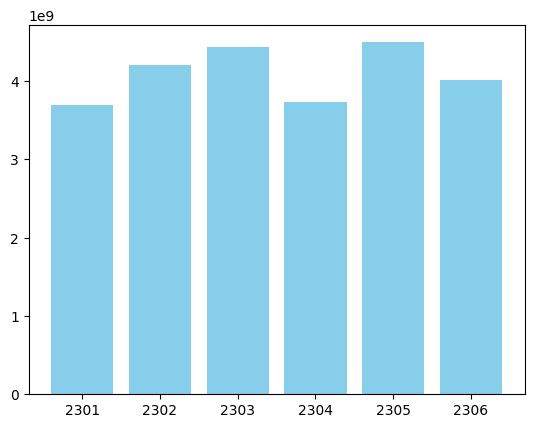

In [11]:
# Total in USD for country and month

dataCons0 = dataCons.groupby(['FECH'])['FOBDOL'].sum().reset_index()
dataCons0['FECH'] = dataCons0['FECH'].astype(str)
plt.figure()
plt.bar(dataCons0['FECH'], dataCons0['FOBDOL'], color='skyblue')
plt.show()

In [12]:
# Total in USD by Country and Destination

dataCons1 = dataCons.loc[:,['COD_PAI4','COD_SAL','FOBPES']]
dataCons1.pivot_table(index='COD_SAL',columns='COD_PAI4',values='FOBPES',aggfunc=sum,fill_value=0).T

COD_SAL,ADZ,AXM,BAQ,BGA,BOG,BUN,CLO,CTG,CUC,CVE,...,LET,MAI,MAM,MDE,PEI,PUU,RCH,SMR,TCO,TRB
COD_PAI4,,,,,,,,,,,,,,,,,,,,,
ABW,0,0,14306535658,76288826,12781378171,1611361281,454303613,29530615007,0,0,...,0,2063589003,41808894142,1889628393,0,0,0,1460783246,0,0
AGO,0,0,0,0,103916468,5256792048,0,3471519296,0,0,...,0,0,0,0,0,0,0,0,0,0
AIA,0,0,0,0,39876726,0,0,0,0,0,...,0,0,0,49719275,0,0,0,0,0,0
ARE,0,0,0,0,38117191432,16889214009,28105362465,142299035489,0,0,...,0,0,0,777826626988,0,0,0,741028462,0,0
ARG,0,0,105936381951,0,66139528339,113428721815,1405119592,391215211164,0,0,...,0,0,0,5608202365,256568263,0,116731644465,49264695080,0,6855997541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,0,0,19898974742,0,508799076,27214039109,0,5997927676,0,0,...,0,0,0,33882719,0,0,0,0,0,0
XCF,0,0,2480186741,0,46903392689,0,509614718700,32390673651,0,0,...,0,0,0,699001079174,0,0,0,6325679899,0,0
YEM,0,0,0,0,0,805947572,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


  COD_PAI4  PAIS      FOBDOL
0      USA   249  6298213698
1      PAN   580  2103412265
2      NLD   573  1218361330
3      CHN   215  1207227862
4      MEX   493   999020068


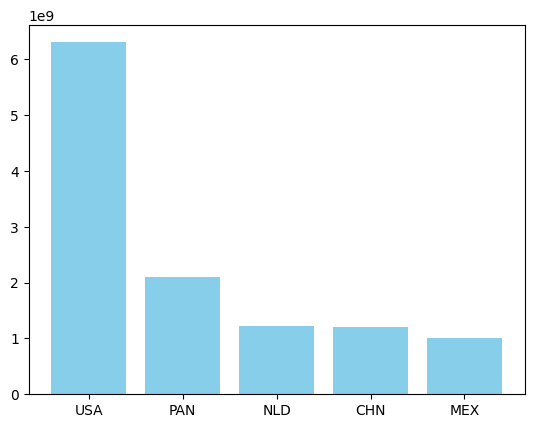

In [14]:
# Top 5 in total exportations (Jan - Jun)

dataCons2 = dataCons.groupby(['COD_PAI4','PAIS'])['FOBDOL'].sum().reset_index()
dataCons2 = dataCons2.sort_values(by='FOBDOL',ascending=False).head(5)
dataCons2 = dataCons2.reset_index(drop=True)
print(dataCons2)
plt.figure()
plt.bar(dataCons2['COD_PAI4'], dataCons2['FOBDOL'], color='skyblue')
plt.show()